<a href="https://colab.research.google.com/github/MLDreamer/AIMathematicallyexplained/blob/main/Simulating_Chain_of_Thought_Intuition_through_Roll_of_Dice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CHAIN-OF-THOUGHT: THE MATHEMATICS

PART 1: THE DICE GAME

Probability of getting at least one 6:

With  1 rolls: 0.1667 = 16.67%
With  3 rolls: 0.4213 = 42.13%
With  5 rolls: 0.5981 = 59.81%
With 10 rolls: 0.8385 = 83.85%
With 20 rolls: 0.9739 = 97.39%
With 50 rolls: 0.9999 = 99.99%


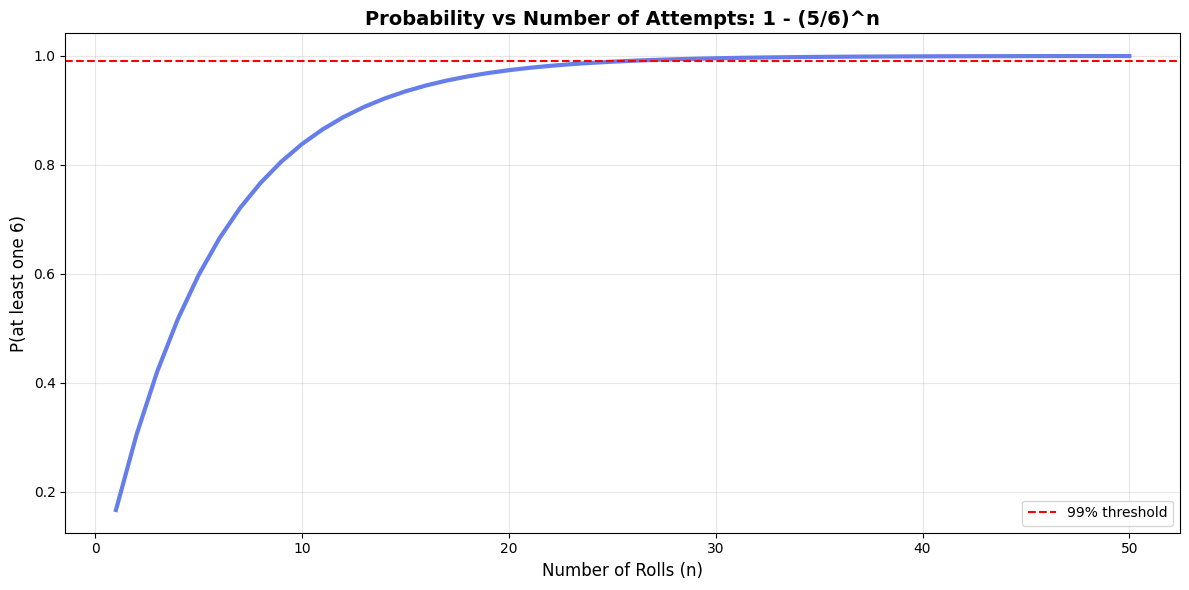


✓ Graph saved as 'dice_probability.png'

PART 2: THE CORE FORMULA

How accuracy improves with more samples:

Base Probability (p) | Samples (n) | Success Rate
-------------------------------------------------------

p = 0.10 (base success rate)
  n =  1 → 0.1000 = 10.00%
  n =  5 → 0.4095 = 40.95%
  n = 10 → 0.6513 = 65.13%
  n = 20 → 0.8784 = 87.84%
  n = 50 → 0.9948 = 99.48%

p = 0.30 (base success rate)
  n =  1 → 0.3000 = 30.00%
  n =  5 → 0.8319 = 83.19%
  n = 10 → 0.9718 = 97.18%
  n = 20 → 0.9992 = 99.92%
  n = 50 → 1.0000 = 100.00%

p = 0.50 (base success rate)
  n =  1 → 0.5000 = 50.00%
  n =  5 → 0.9688 = 96.88%
  n = 10 → 0.9990 = 99.90%
  n = 20 → 1.0000 = 100.00%
  n = 50 → 1.0000 = 100.00%


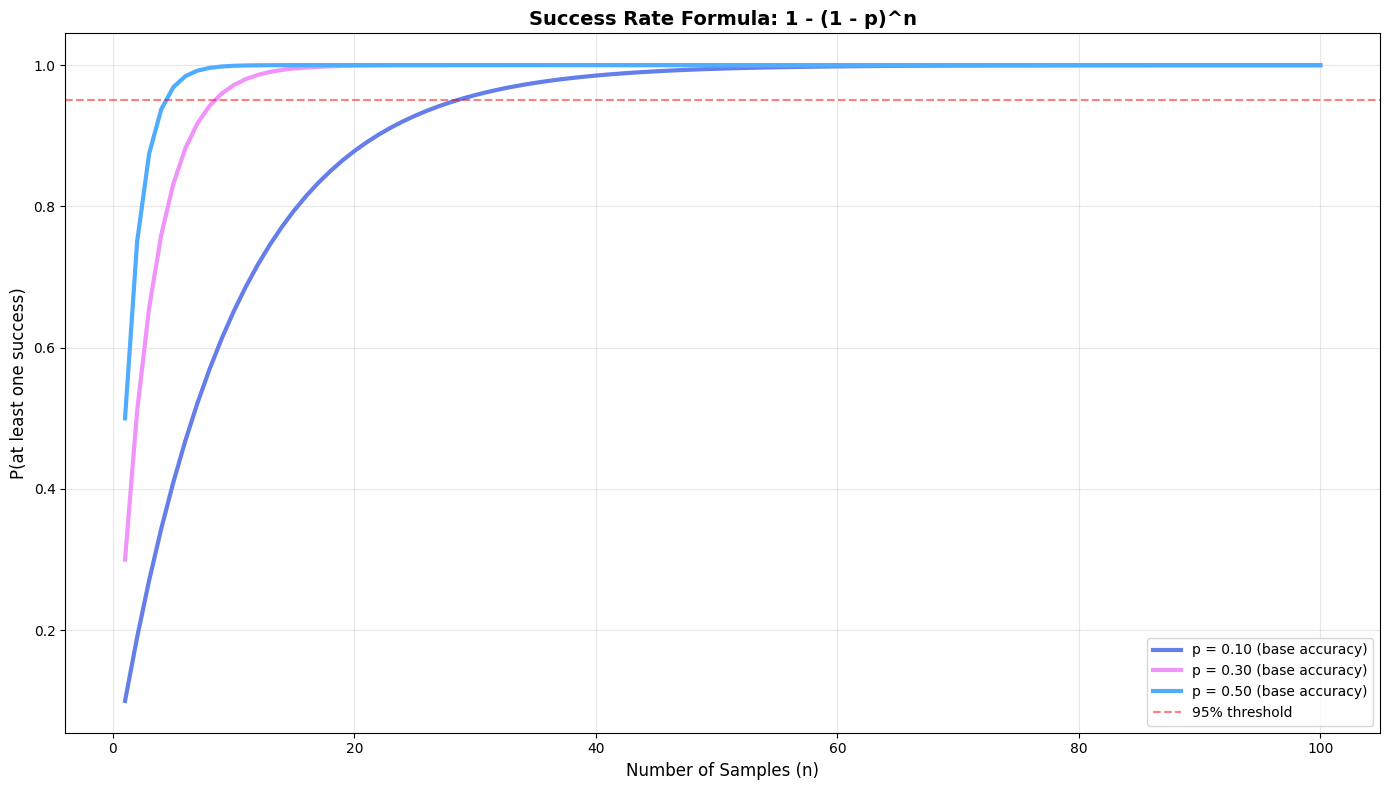


✓ Graph saved as 'formula_visualization.png'

PART 3: TOKEN GENERATION SIMULATION

Bat and Ball Problem: Direct Answer vs Chain-of-Thought

DIRECT ANSWER (1 sample):
----------------------------------------
$0.10 (wrong): score = 2.8, probability = 0.668 (66.8%)
$0.05 (correct): score = 2.1, probability = 0.332 (33.2%)


CHAIN-OF-THOUGHT (after 5 reasoning steps):
----------------------------------------
$0.10 (wrong): score = 1.2, probability = 0.100 (10.0%)
$0.05 (correct): score = 3.4, probability = 0.900 (90.0%)

📊 Accuracy improvement: 33.2% → 90.0%


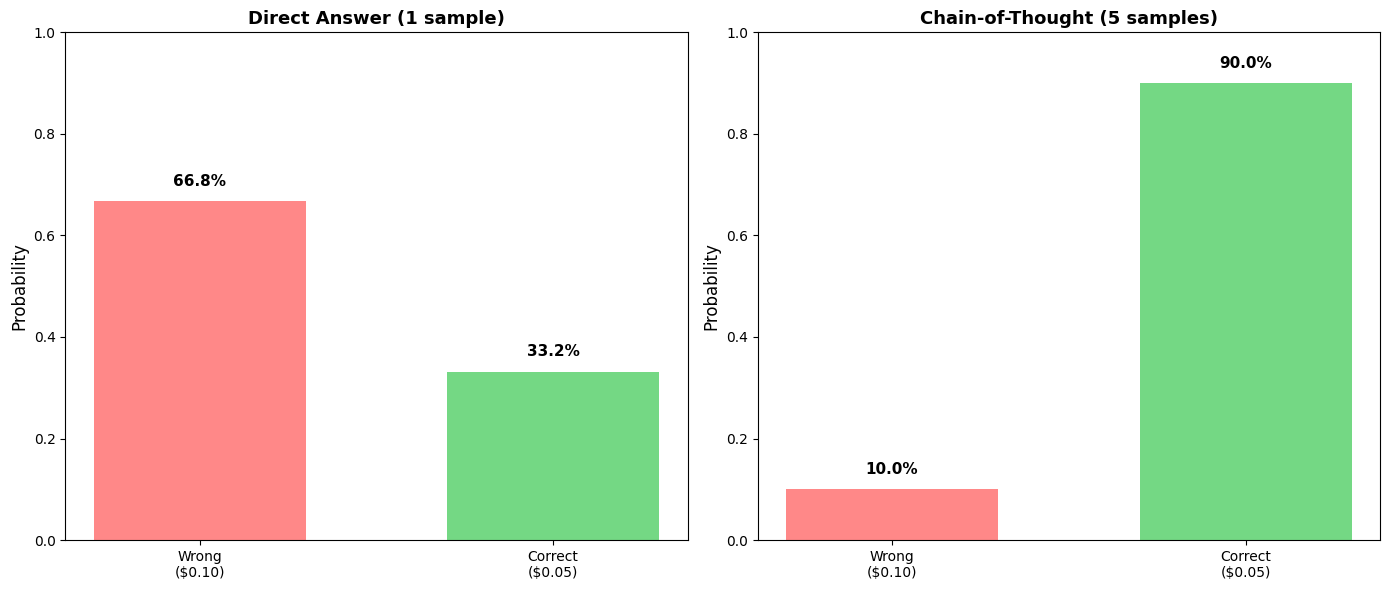


✓ Graph saved as 'probability_shift.png'

PART 4: MONTE CARLO π ESTIMATION

Estimating π with different sample sizes:

Samples  | Estimate | Error
-----------------------------------
     10  | 3.60000  | 14.592%
    100  | 3.28000  | 4.406%
   1000  | 3.09600  | 1.451%
  10000  | 3.13480  | 0.216%
 100000  | 3.14412  | 0.080%

True π = 3.14159

Notice: More samples → better estimate
Same principle as chain-of-thought!


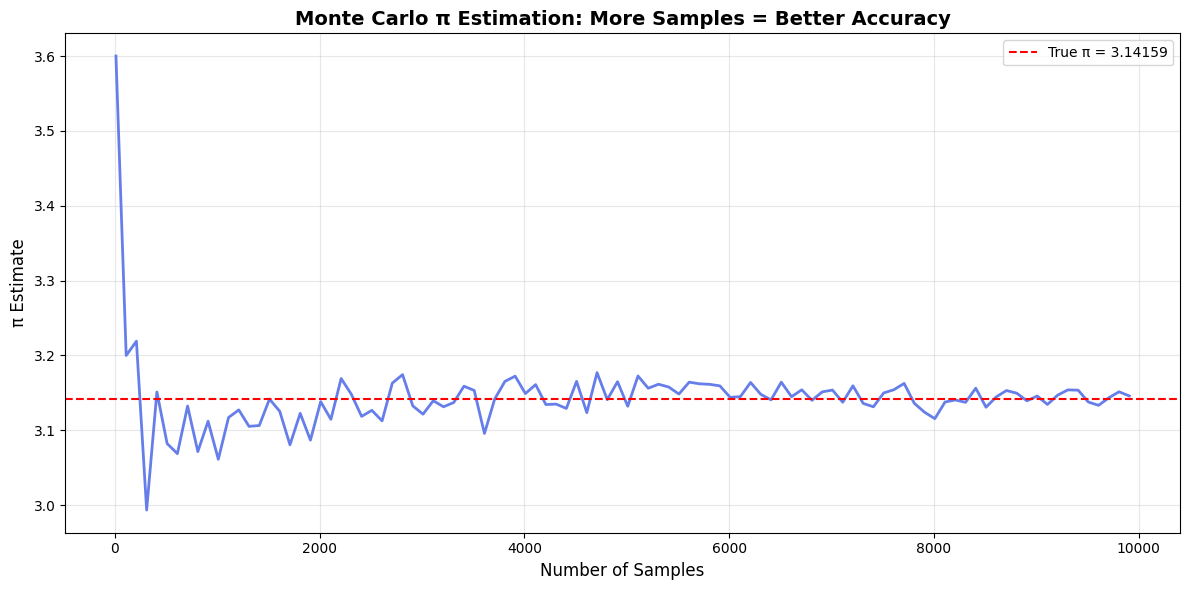


✓ Graph saved as 'monte_carlo_pi.png'

PART 5: INTERACTIVE CALCULATOR

Try different scenarios:

GPT-4 direct answer:
  Base accuracy: 30.0%
  Samples: 1
  Final accuracy: 30.00%
  Improvement: +0.00%
  Multiplier: 1.00x

GPT-4 with short CoT:
  Base accuracy: 30.0%
  Samples: 10
  Final accuracy: 97.18%
  Improvement: +67.18%
  Multiplier: 3.24x

O1-preview thinking:
  Base accuracy: 30.0%
  Samples: 50
  Final accuracy: 100.00%
  Improvement: +70.00%
  Multiplier: 3.33x

Very hard problem, direct:
  Base accuracy: 10.0%
  Samples: 1
  Final accuracy: 10.00%
  Improvement: +-0.00%
  Multiplier: 1.00x

Very hard problem, long CoT:
  Base accuracy: 10.0%
  Samples: 100
  Final accuracy: 100.00%
  Improvement: +90.00%
  Multiplier: 10.00x


PART 6: REAL MODEL TEST (OPTIONAL)

This section loads a small language model to demonstrate
actual probability distributions during generation.


Run real model test? (y/n): y

Loading model (this may take a few minutes)...


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

✓ Loaded gpt2

Prompt: 'The capital of France is'

Top 5 predicted next tokens with probabilities:

  ' the' → 0.0846 (8.46%)
  ' now' → 0.0479 (4.79%)
  ' a' → 0.0462 (4.62%)
  ' France' → 0.0324 (3.24%)
  ' Paris' → 0.0322 (3.22%)

This shows how models assign probabilities to each possible next token.
Chain-of-thought just samples from this distribution multiple times!

SUMMARY: THE MATHEMATICS OF CHAIN-OF-THOUGHT

KEY FORMULA:

  P(success) = 1 - (1 - p)^n

Where:
  p = probability of correct answer in single sample
  n = number of samples (thinking steps)

KEY INSIGHTS:

1. Chain-of-thought = taking more samples from probability distribution
2. More samples = higher chance of finding correct answer
3. Not reasoning, just probability: 1 - (1 - p)^n
4. Same principle as dice rolls, Monte Carlo, random search
5. O1 "thinks longer" = O1 takes more samples (larger n)

The math is simple. The results are impressive.
But it's probability, not reasoning.

All graphs saved! Check your Cola

In [1]:
# Chain-of-Thought Mathematics Demo
# Copy this entire code into a Google Colab notebook

# Install required libraries
!pip install transformers torch numpy matplotlib -q

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import warnings
warnings.filterwarnings('ignore')

print("=" * 60)
print("CHAIN-OF-THOUGHT: THE MATHEMATICS")
print("=" * 60)

# ============================================================
# PART 1: THE DICE GAME ANALOGY
# ============================================================

print("\n" + "=" * 60)
print("PART 1: THE DICE GAME")
print("=" * 60)

def calculate_dice_probability(num_rolls):
    """Calculate probability of getting at least one 6"""
    prob_no_six = (5/6) ** num_rolls
    prob_at_least_one_six = 1 - prob_no_six
    return prob_at_least_one_six

print("\nProbability of getting at least one 6:\n")
for n in [1, 3, 5, 10, 20, 50]:
    prob = calculate_dice_probability(n)
    print(f"With {n:2d} rolls: {prob:.4f} = {prob*100:.2f}%")

# Visualize
rolls = range(1, 51)
probs = [calculate_dice_probability(n) for n in rolls]

plt.figure(figsize=(12, 6))
plt.plot(rolls, probs, linewidth=3, color='#667eea')
plt.axhline(y=0.99, color='red', linestyle='--', label='99% threshold')
plt.xlabel('Number of Rolls (n)', fontsize=12)
plt.ylabel('P(at least one 6)', fontsize=12)
plt.title('Probability vs Number of Attempts: 1 - (5/6)^n', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('dice_probability.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Graph saved as 'dice_probability.png'")

# ============================================================
# PART 2: THE FORMULA - 1 - (1 - p)^n
# ============================================================

print("\n" + "=" * 60)
print("PART 2: THE CORE FORMULA")
print("=" * 60)

def success_probability(p, n):
    """
    Calculate probability of success with n attempts
    p: probability of success on single attempt
    n: number of attempts
    """
    return 1 - (1 - p) ** n

# Test with different base probabilities
print("\nHow accuracy improves with more samples:\n")
print("Base Probability (p) | Samples (n) | Success Rate")
print("-" * 55)

for p in [0.10, 0.30, 0.50]:
    print(f"\np = {p:.2f} (base success rate)")
    for n in [1, 5, 10, 20, 50]:
        success = success_probability(p, n)
        print(f"  n = {n:2d} → {success:.4f} = {success*100:.2f}%")

# Visualize multiple curves
plt.figure(figsize=(14, 8))
samples = range(1, 101)
colors = ['#667eea', '#f093fb', '#4facfe']
base_probs = [0.10, 0.30, 0.50]

for p, color in zip(base_probs, colors):
    success_rates = [success_probability(p, n) for n in samples]
    plt.plot(samples, success_rates, linewidth=3, color=color,
             label=f'p = {p:.2f} (base accuracy)')

plt.axhline(y=0.95, color='red', linestyle='--', alpha=0.5, label='95% threshold')
plt.xlabel('Number of Samples (n)', fontsize=12)
plt.ylabel('P(at least one success)', fontsize=12)
plt.title('Success Rate Formula: 1 - (1 - p)^n', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('formula_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Graph saved as 'formula_visualization.png'")

# ============================================================
# PART 3: SIMULATING TOKEN GENERATION
# ============================================================

print("\n" + "=" * 60)
print("PART 3: TOKEN GENERATION SIMULATION")
print("=" * 60)

def softmax_with_temperature(scores, temperature=1.0):
    """Convert scores to probabilities using temperature-scaled softmax"""
    scaled_scores = np.array(scores) / temperature
    exp_scores = np.exp(scaled_scores - np.max(scaled_scores))  # numerical stability
    return exp_scores / exp_scores.sum()

# Simulate the bat and ball problem
print("\nBat and Ball Problem: Direct Answer vs Chain-of-Thought\n")

# Direct answer scenario
print("DIRECT ANSWER (1 sample):")
print("-" * 40)
direct_scores = {"$0.10 (wrong)": 2.8, "$0.05 (correct)": 2.1}
direct_probs = softmax_with_temperature(list(direct_scores.values()))

for i, (answer, score) in enumerate(direct_scores.items()):
    print(f"{answer}: score = {score:.1f}, probability = {direct_probs[i]:.3f} ({direct_probs[i]*100:.1f}%)")

# Chain-of-thought scenario (after intermediate steps)
print("\n\nCHAIN-OF-THOUGHT (after 5 reasoning steps):")
print("-" * 40)
cot_scores = {"$0.10 (wrong)": 1.2, "$0.05 (correct)": 3.4}
cot_probs = softmax_with_temperature(list(cot_scores.values()))

for i, (answer, score) in enumerate(cot_scores.items()):
    print(f"{answer}: score = {score:.1f}, probability = {cot_probs[i]:.3f} ({cot_probs[i]*100:.1f}%)")

print(f"\n📊 Accuracy improvement: {direct_probs[1]:.1%} → {cot_probs[1]:.1%}")

# Visualize probability shift
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Direct answer
categories = ['Wrong\n($0.10)', 'Correct\n($0.05)']
ax1.bar(categories, direct_probs, color=['#ff6b6b', '#51cf66'], alpha=0.8, width=0.6)
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_title('Direct Answer (1 sample)', fontsize=13, fontweight='bold')
ax1.set_ylim([0, 1])
for i, v in enumerate(direct_probs):
    ax1.text(i, v + 0.03, f'{v:.1%}', ha='center', fontsize=11, fontweight='bold')

# Chain-of-thought
ax2.bar(categories, cot_probs, color=['#ff6b6b', '#51cf66'], alpha=0.8, width=0.6)
ax2.set_ylabel('Probability', fontsize=12)
ax2.set_title('Chain-of-Thought (5 samples)', fontsize=13, fontweight='bold')
ax2.set_ylim([0, 1])
for i, v in enumerate(cot_probs):
    ax2.text(i, v + 0.03, f'{v:.1%}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('probability_shift.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Graph saved as 'probability_shift.png'")

# ============================================================
# PART 4: MONTE CARLO ESTIMATION
# ============================================================

print("\n" + "=" * 60)
print("PART 4: MONTE CARLO π ESTIMATION")
print("=" * 60)

def estimate_pi(num_samples):
    """Estimate π using Monte Carlo method"""
    np.random.seed(42)
    x = np.random.uniform(-1, 1, num_samples)
    y = np.random.uniform(-1, 1, num_samples)
    inside_circle = (x**2 + y**2) <= 1
    pi_estimate = 4 * inside_circle.sum() / num_samples
    error = abs(pi_estimate - np.pi) / np.pi * 100
    return pi_estimate, error

print("\nEstimating π with different sample sizes:\n")
print("Samples  | Estimate | Error")
print("-" * 35)

sample_sizes = [10, 100, 1000, 10000, 100000]
for n in sample_sizes:
    estimate, error = estimate_pi(n)
    print(f"{n:7d}  | {estimate:.5f}  | {error:.3f}%")

print(f"\nTrue π = {np.pi:.5f}")
print("\nNotice: More samples → better estimate")
print("Same principle as chain-of-thought!")

# Visualize convergence
estimates = []
errors = []
for n in range(10, 10001, 100):
    est, err = estimate_pi(n)
    estimates.append(est)
    errors.append(err)

plt.figure(figsize=(12, 6))
plt.plot(range(10, 10001, 100), estimates, linewidth=2, color='#667eea')
plt.axhline(y=np.pi, color='red', linestyle='--', label=f'True π = {np.pi:.5f}')
plt.xlabel('Number of Samples', fontsize=12)
plt.ylabel('π Estimate', fontsize=12)
plt.title('Monte Carlo π Estimation: More Samples = Better Accuracy', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('monte_carlo_pi.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Graph saved as 'monte_carlo_pi.png'")

# ============================================================
# PART 5: INTERACTIVE CALCULATOR
# ============================================================

print("\n" + "=" * 60)
print("PART 5: INTERACTIVE CALCULATOR")
print("=" * 60)

def chain_of_thought_calculator(base_accuracy, num_samples):
    """
    Calculate how chain-of-thought improves accuracy

    base_accuracy: probability of correct answer in single sample (0 to 1)
    num_samples: number of chain-of-thought steps
    """
    final_accuracy = 1 - (1 - base_accuracy) ** num_samples
    improvement = final_accuracy - base_accuracy
    multiplier = final_accuracy / base_accuracy if base_accuracy > 0 else float('inf')

    return {
        'base_accuracy': base_accuracy,
        'num_samples': num_samples,
        'final_accuracy': final_accuracy,
        'improvement': improvement,
        'multiplier': multiplier
    }

print("\nTry different scenarios:\n")

scenarios = [
    (0.30, 1, "GPT-4 direct answer"),
    (0.30, 10, "GPT-4 with short CoT"),
    (0.30, 50, "O1-preview thinking"),
    (0.10, 1, "Very hard problem, direct"),
    (0.10, 100, "Very hard problem, long CoT"),
]

for base_acc, samples, description in scenarios:
    result = chain_of_thought_calculator(base_acc, samples)
    print(f"{description}:")
    print(f"  Base accuracy: {result['base_accuracy']:.1%}")
    print(f"  Samples: {result['num_samples']}")
    print(f"  Final accuracy: {result['final_accuracy']:.2%}")
    print(f"  Improvement: +{result['improvement']:.2%}")
    print(f"  Multiplier: {result['multiplier']:.2f}x\n")

# ============================================================
# PART 6: REAL MODEL DEMONSTRATION (OPTIONAL)
# ============================================================

print("\n" + "=" * 60)
print("PART 6: REAL MODEL TEST (OPTIONAL)")
print("=" * 60)
print("\nThis section loads a small language model to demonstrate")
print("actual probability distributions during generation.")
print("\nWARNING: This requires ~2GB download and GPU for speed.")
user_input = input("\nRun real model test? (y/n): ").strip().lower()

if user_input == 'y':
    print("\nLoading model (this may take a few minutes)...")

    try:
        model_name = "gpt2"  # Small model for demonstration
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModelForCausalLM.from_pretrained(model_name)

        # Set pad token
        tokenizer.pad_token = tokenizer.eos_token

        print(f"✓ Loaded {model_name}\n")

        # Test prompt
        prompt = "The capital of France is"

        print(f"Prompt: '{prompt}'")
        print("\nTop 5 predicted next tokens with probabilities:\n")

        # Tokenize
        inputs = tokenizer(prompt, return_tensors="pt")

        # Get model predictions
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits[0, -1, :]
            probs = torch.softmax(logits, dim=0)

        # Get top 5
        top_probs, top_indices = torch.topk(probs, 5)

        for prob, idx in zip(top_probs, top_indices):
            token = tokenizer.decode([idx])
            print(f"  '{token}' → {prob:.4f} ({prob*100:.2f}%)")

        print("\nThis shows how models assign probabilities to each possible next token.")
        print("Chain-of-thought just samples from this distribution multiple times!")

    except Exception as e:
        print(f"\n⚠ Error loading model: {e}")
        print("Skipping real model demonstration.")
else:
    print("\nSkipped real model test.")

# ============================================================
# SUMMARY
# ============================================================

print("\n" + "=" * 60)
print("SUMMARY: THE MATHEMATICS OF CHAIN-OF-THOUGHT")
print("=" * 60)

print("""
KEY FORMULA:

  P(success) = 1 - (1 - p)^n

Where:
  p = probability of correct answer in single sample
  n = number of samples (thinking steps)

KEY INSIGHTS:

1. Chain-of-thought = taking more samples from probability distribution
2. More samples = higher chance of finding correct answer
3. Not reasoning, just probability: 1 - (1 - p)^n
4. Same principle as dice rolls, Monte Carlo, random search
5. O1 "thinks longer" = O1 takes more samples (larger n)

The math is simple. The results are impressive.
But it's probability, not reasoning.
""")

print("=" * 60)
print("All graphs saved! Check your Colab files.")
print("=" * 60)